In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


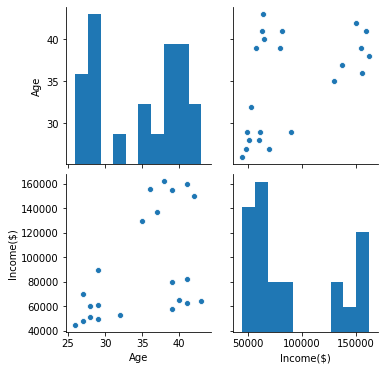

In [2]:
sns.pairplot(df)

In [3]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
y_pred=km.fit_predict(df[['Age','Income($)']])

In [5]:
df['Cluster'] = y_pred

In [6]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


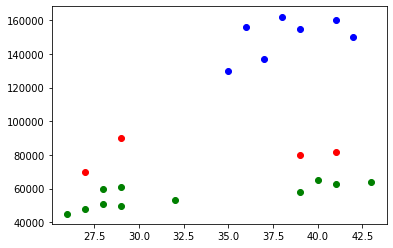

In [7]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="blue")
plt.scatter(df3.Age,df3['Income($)'],color="red")

In [8]:
df = df.rename(columns={'Income($)': 'Income'})
scalar = MinMaxScaler()
scalar.fit(df[['Income']])
df['Income'] = scalar.transform(df[['Income']])

scalar.fit(df[['Age']])
df.Age=scalar.transform(df[['Age']])
df

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [10]:
km = KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income']])

In [11]:
df['Cluster'] = y_pred

In [12]:
df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


No handles with labels found to put in legend.


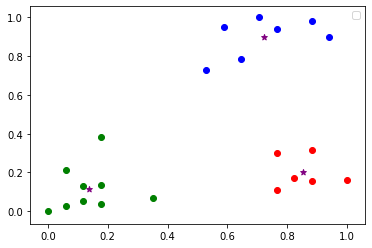

In [16]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
plt.scatter(df1.Age,df1['Income'],color="green")
plt.scatter(df2.Age,df2['Income'],color="blue")
plt.scatter(df3.Age,df3['Income'],color="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.legend()

In [17]:
k_range = range(1,10)
sse  =[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

In [18]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.22884444183667124,
 0.16858512236029757,
 0.13265419827245162,
 0.10383752586603559]

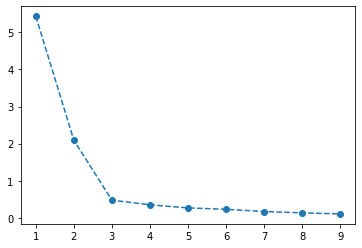

In [29]:
plt.plot(k_range,sse,marker='o',linestyle='--')

So we will we can decide we will need 3 clusters